In [1]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

MODEL_PATH = '../models_segmantation/unet_segmentation_ckp.keras'
assert os.path.exists(MODEL_PATH), "Model file not found"
SRC_DIR = './src_data_unet' # Images from src_data resized to 128x128
assert os.path.exists(SRC_DIR), "Source directory not found"
DESTINATION_DIR = './segmented_data'
os.makedirs(DESTINATION_DIR, exist_ok=True)
CLASSES = ['rock', 'paper', 'scissors']
img_size = (128, 128)

def load_images(src_dir):
    image_paths = [os.path.join(src_dir, fname) for fname in os.listdir(src_dir)]
    images = []
    filenames = []
    
    for img_path in image_paths:
        img = load_img(img_path, target_size=img_size)
        img = img_to_array(img) / 255.0  
        images.append(img)
        filenames.append(os.path.basename(img_path))  
    return np.array(images), filenames

model = load_model(MODEL_PATH)

for class_name in CLASSES:
    total_predictions = 0
    print(f"Segmenting images from class {class_name}")
    
    image_dir = os.path.join(SRC_DIR, class_name)  
    output_dir = os.path.join(DESTINATION_DIR, class_name)  
    os.makedirs(output_dir, exist_ok=True)
    
    images, filenames = load_images(image_dir)
    
    predictions = model.predict(images)
    
    for pred, fname in zip(predictions, filenames):

        pred_mask = (pred.squeeze() > 0.5).astype(np.uint8) * 255 
        mask_image = Image.fromarray(pred_mask)
        mask_image = mask_image.convert("L")  
        output_path = os.path.join(output_dir, fname)  
        mask_image.save(output_path)
        total_predictions += 1
        
    print(f"Segmented {total_predictions} images from class {class_name}")


Segmenting images from class rock
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 130ms/step
Segmented 2389 images from class rock
Segmenting images from class paper
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step
Segmented 2409 images from class paper
Segmenting images from class scissors
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 128ms/step
Segmented 2430 images from class scissors


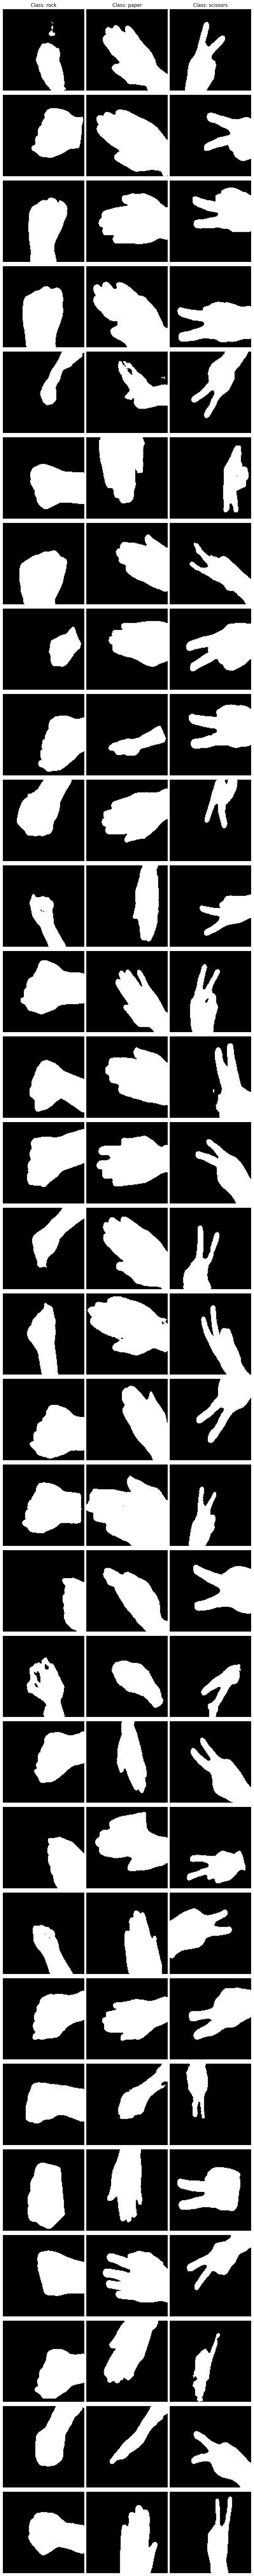

In [88]:
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_random_images(src_dir, classes, img_size=(128, 128), num_images=5):
    num_cols = len(classes)
    num_rows = num_images
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
    
    for i, class_name in enumerate(classes):
        class_dir = os.path.join(src_dir, class_name)
        image_files = os.listdir(class_dir)
        random_files = random.sample(image_files, min(num_images, len(image_files)))
        
        for j, img_file in enumerate(random_files):
            img_path = os.path.join(class_dir, img_file)
            img = load_img(img_path, target_size=img_size)
            img_array = img_to_array(img) / 255.0
            
            ax = axes[j, i]  # Wybieramy odpowiednią komórkę w siatce
            ax.imshow(img_array)
            ax.axis("off")
            if j == 0:
                ax.set_title(f"Class: {class_name}", fontsize=12)
    
    plt.tight_layout()
    plt.show()

visualize_random_images(DESTINATION_DIR, CLASSES, img_size=(128, 128), num_images=30)